In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

**Task 1**

In [3]:
# Importing data
wine_data = pd.read_csv('DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv')
print(wine_data.shape)
wine_data.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Create a X and y
X = wine_data.drop(['alcohol'], axis=1)
y = wine_data['alcohol']

# Build a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# X_train_normal.shape, X_train.shape
X_train.shape, y_train.shape

((3918, 11), (3918,))

**Task 2**

In [7]:
# Building a model

tf.random.set_seed(42)

# Replicating the original model
wine_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(10),      #      adding second layer
                               tf.keras.layers.Dense(1)        #      adding third layer
])

# Compile a model
wine_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fitting a model
history = wine_model.fit(X_train,y_train, epochs=100)    # verbose = set verbose=0 for less output

Epoch 1/100
123/123 [==============================] - 1s 2ms/step - loss: 1.5683 - mae: 1.5683
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 1.0589 - mae: 1.0589
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9374 - mae: 0.9374
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9421 - mae: 0.9421
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9972 - mae: 0.9972
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9152 - mae: 0.9152
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9549 - mae: 0.9549
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.8788 - mae: 0.8788
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.9392 - mae: 0.9392
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.8623 - mae: 0.8623
Epoch 11/100
123/123 [=================

In [8]:
# Evaluate a model 
wine_model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.7613 - mae: 0.7613


[0.761273980140686, 0.761273980140686]

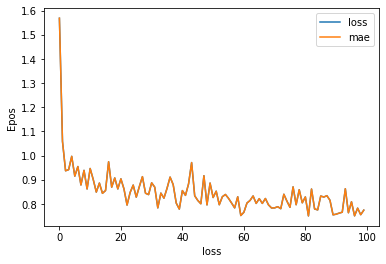

In [9]:
# plot the history (also known as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

In [10]:
# make and plot prediction for model_1
Y_pred_1 = wine_model.predict(X_test)
Y_pred_1

array([[10.436907 ],
       [12.378781 ],
       [12.069226 ],
       [ 9.917799 ],
       [11.610923 ],
       [10.176811 ],
       [ 8.389148 ],
       [ 9.744298 ],
       [11.316235 ],
       [ 8.703251 ],
       [11.287218 ],
       [10.720117 ],
       [10.830006 ],
       [10.937447 ],
       [ 7.948572 ],
       [ 8.982783 ],
       [11.692691 ],
       [ 9.635304 ],
       [10.803519 ],
       [10.505818 ],
       [ 9.759646 ],
       [11.626472 ],
       [ 9.488563 ],
       [ 9.264708 ],
       [11.432015 ],
       [ 9.727162 ],
       [ 9.40788  ],
       [10.752489 ],
       [10.023409 ],
       [ 9.828649 ],
       [ 8.673618 ],
       [ 8.9399395],
       [ 8.673441 ],
       [10.303916 ],
       [ 9.03574  ],
       [11.610703 ],
       [12.002771 ],
       [ 9.519175 ],
       [ 9.251356 ],
       [10.799405 ],
       [ 9.251185 ],
       [ 9.349291 ],
       [11.497813 ],
       [11.349805 ],
       [ 9.093244 ],
       [ 9.131189 ],
       [ 9.879832 ],
       [ 8.82

In [11]:
X_train.shape, y_train.shape

((3918, 11), (3918,))

**Task 3**

In [12]:
# Calculate the mean_absoulete _error 
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = Y_pred_1.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.7612741>

In [13]:
# Calculate the mean_squared_error 
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = Y_pred_1.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.940612>

**Building the model with other loss function**

**Building a model - mae**

In [14]:
tf.random.set_seed(42)

# Replicating the original model
model_mae = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_mae.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fitting a model
history_mae = model_mae.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_mae_loss, model_mae_mae = model_mae.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - mae: 0.8036


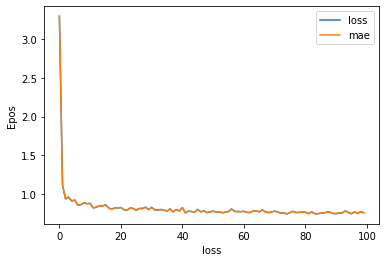

In [15]:
# plot the history (also known as loss curve)
pd.DataFrame(history_mae.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

**Building a model - msle**

In [16]:
tf.random.set_seed(42)

# Replicating the original model
model_msle = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_msle.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['msle'])

# Fitting a model
history_msle = model_msle.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_msle_loss, model_msle_mae = model_msle.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - msle: 0.0079


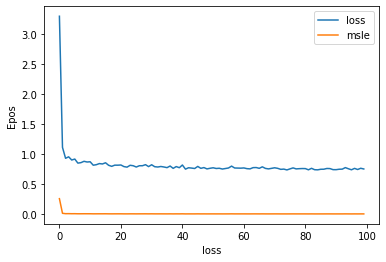

In [17]:
# plot the history (also known as loss curve)
pd.DataFrame(history_msle.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

**Building a model - mse**

In [18]:
tf.random.set_seed(42)

# Replicating the original model
model_mse = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_mse.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

# Fitting a model
history_mse = model_mse.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_mse_loss, model_mse_mae = model_mse.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - mse: 1.0421


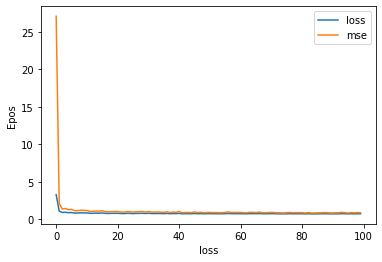

In [19]:
# plot the history (also known as loss curve)
pd.DataFrame(history_mse.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

In [20]:
# Comparing the model

model_result = [['Model_MAE',model_mae_loss,model_mae_mae],
                ['Model_MSLE',model_msle_loss, model_msle_mae],
                ['Model_MSE',model_mse_loss, model_mse_mae]]

In [21]:
final_result = pd.DataFrame(model_result, columns=['Model','Losses','MAE'])
final_result

,Model,Losses,MAE
0,Model_MAE,0.803588,0.803588
1,Model_MSLE,0.803588,0.007940
2,Model_MSE,0.803588,1.042120
